**Méthodes numériques, PHYS-F303 (Module 6).**
*********************************
Méthode de Monte-Carlo, Mouvement Brownien, Modèle d'Ising
==
### But #
Dans ce module nous allons explorer l'utilisation de nombres pseudo-aléatoires dans la résolution de problèmes physiques. En physique statistique, on considère des ensembles de particules macroscopiques. Les simulations numériques dans ce domaines sont très utiles et très largement utilisées pour reproduire les comportements de grands nombre de particules observés en réalité. 
Nous allons commencer par nous familiariser avec les nombres pseudo-aléatoires en générant certaines distributions très usuelles comme les gaussiennes et les distributions exponentielles par diverses méthodes.
Ensuite, nous utiliserons ces distributions pour décrire deux phénomènes physiques:
le mouvement brownien (marche aléatoire) et la transition para-ferromagnétique selon le modèle d'Ising. Nous pourrons ensuite utiliser les simulations et interprèter physiquement les résultats.

## Challenge 1: Nombres aléatoires
Le but de ce premier Challenge est de se familiariser avec les nombres pseudo-aléatoires et les distributions.

### Partie 1:
But: Se familiariser avec quelques uns des générateurs aléatoires existant de Python. Comparer les versions des distributions exponentielles et Gaussiennes du notebook de l'énoncé avec celles implémentées dans les librairies python.

Nous commencons par importer les librairies dont nous aurons besoin tout au long de ce travail: numpy, matplotlib et scipy.

In [1]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
import scipy
from scipy import stats

Nous testons différentes distributions implémentées dans Python:
- numpy.random.uniform(a,b) fournit une distribution uniforme sur l'intervalle $[a,b]$
- numpy.random.normal(a,b,size=l) fournit une distribution gaussienne de moyenne a, de variance b et construite sur un échantillon de taille l
- numpy.random.exponential(size=l) fournit une distribution exponentielle sur un échantillon de taille l 

Nous allons les comparer aux codes fournis dans le numerical-mooc en traçant sur les graphiques des distributions la ligne de la distribution théorique en bleu.

#### Distribution uniforme:

In [2]:
i=0
a=numpy.zeros(100000)
while i<(len(a)-1) :
    a[i]=(numpy.random.uniform(42,50))
    i+=1

In [3]:
i=0
b=numpy.zeros(100000)
while i<(len(a)-1) :
    
    t=numpy.random.random()
    b[i]=(42*(1-t)+t*50)
    i+=1

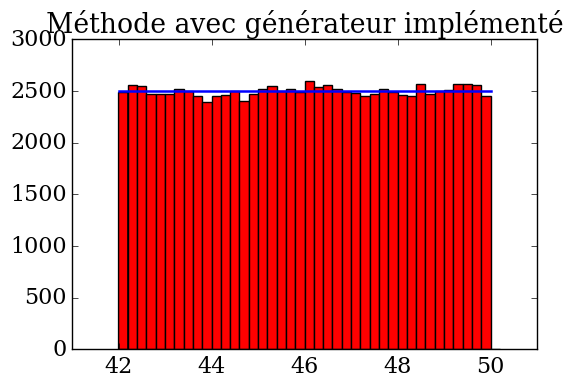

In [4]:
pyplot.title('Méthode avec générateur implémenté')
pyplot.xlim(41,51)
bins=numpy.arange(42,50.2, 0.2)
pyplot.hist(a,bins,normed=False, color = 'red');

xc = bins[:-1]

# nombre de bins de 42 à 50: n_bins = len(bins)-2
# nombre d'éléments par bin pour une répartition parfaitement uniforme  100000/n_bins

n_bins = len(bins)-2
y = numpy.ones(len(xc))*(100000/(n_bins))
pyplot.plot(xc,y,lw=1.8,color='blue')


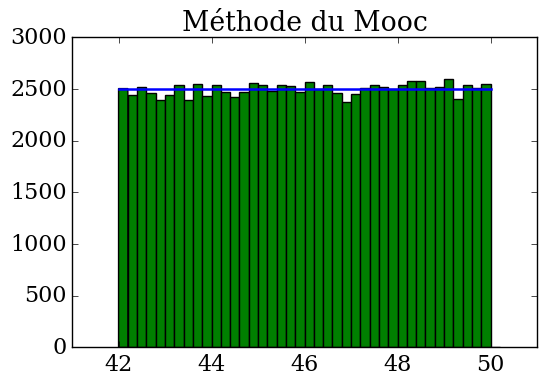

In [5]:
pyplot.title('Méthode du Mooc')
pyplot.xlim(41,51)
bins=numpy.arange(42,50.2, 0.2)
pyplot.hist(b,bins,normed=False, color = 'green');

xc = bins[:-1]

# nombre de bins de 42 à 50: n_bins = len(bins)-2
# nombre d'éléments par bin pour une répartition parfaitement uniforme  100000/n_bins

n_bins = len(bins)-2
y = numpy.ones(len(xc))*(100000/(n_bins))
pyplot.plot(xc,y,lw=1.8,color='blue')


#### Distribution Gaussienne: 

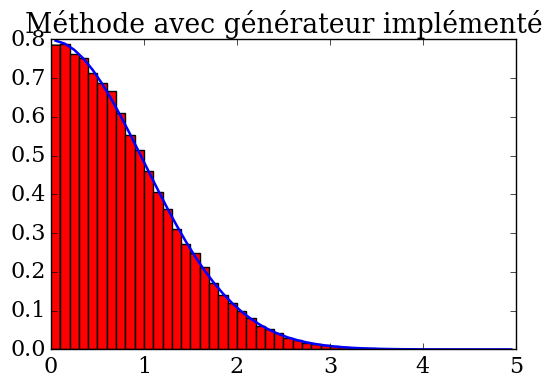

In [6]:
a=(numpy.random.normal(0,1,size=100000))

for i in range (len(a)) :
    if a[i]<0 :
        while a[i]<0 :
            a[i]=(numpy.random.normal(0,1,size=None))

# Plots
binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.title('Méthode avec générateur implémenté')
pyplot.hist(a,bins=numpy.arange(0,5., binwidth),normed=True,color='Red');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=1.8,color='blue')


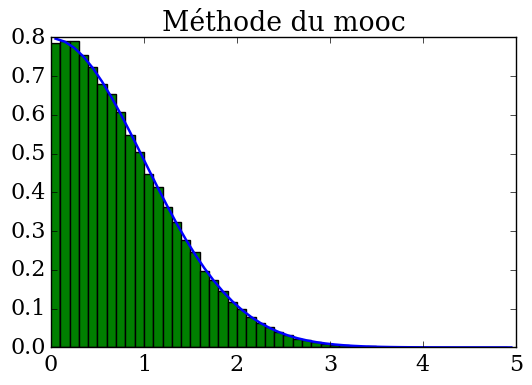

In [7]:
# Number of random numbers to draw according to p1 
K = 1.4

# Empty list for the final set of numbers
h=[]

while len(h)<100000:
    u1 = numpy.random.random_sample()
    
    # Distribute g according to the exponential distribution
    g = numpy.log(1/(1-u1))
    
    # Generate a second number for the acceptance/rejection condition
    u2 = numpy.random.random_sample()
    
    # Acceptance/rejection step
    ratio = 2*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi) / \
                (K*numpy.exp(-g))
    if (u2<ratio):
        # Append g to the set h
        h.append(g)


# Plots
binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.title('Méthode du mooc')
pyplot.hist(h,bins=numpy.arange(0.,5., binwidth),normed=True,color='green');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=1.8,color='blue')


#### Distribution exponentielle:

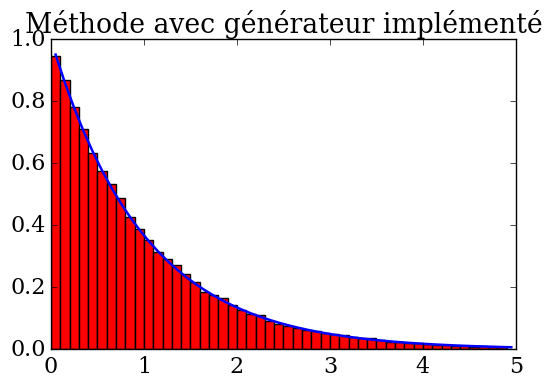

In [8]:
a=numpy.random.exponential(size=100000)

binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,numpy.exp(-xc),lw=1.8,color='blue')

pyplot.title('Méthode avec générateur implémenté')
pyplot.xlim(0,5)
pyplot.hist(a,bins=numpy.arange(-3.,5., binwidth),normed=True, color = 'red');


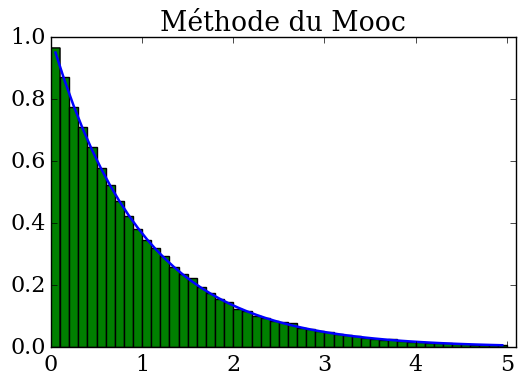

In [9]:
alpha = 1 # rate of the exponential distribution
x = numpy.random.random_sample(100000)
y = -1/alpha*numpy.log(1-x)

# Plots
binwidth=0.1
pyplot.xlim(0,5.1)
bins=numpy.arange(0.,5.1, binwidth)
pyplot.title('Méthode du Mooc')
pyplot.hist(y,bins,normed=True, color= 'green');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=1.8, color='blue')


### Partie 2: Box Muller algorithm
Nous allons maintenant utiliser un algorithme appelé "Box Muller" pour générer des distributions gaussiennes de moyenne 0 et d'écart-type 1. Nous pourrons ensuite les comparer aux méthodes précédentes en dessinant la courbe théorique de la gaussienne sur les histogrammes obtenus par Box-Muller.
Voici la définition de cette algorithme:

On part de deux variables aléatoires indépendantes $U$ et $V$ uniformément distribuées sur [0,1]. L'algorithme de Box Muller les transforme en deux variables aléatoires indépendantes distribuées selon une Gaussienne de moyenne 0 et d'écart-type 1:
$$Z=\sqrt{-2ln(U)}cos(2\pi V)$$
$$W=\sqrt{-2ln(U)}sin(2\pi V)$$


On commence par générer les deux distributions uniformes $U$ et $V$:

In [10]:
i=0
u=numpy.zeros(100000)
v=numpy.zeros(100000)
while i<(len(u)) :
    u[i]=(numpy.random.uniform(0,1))
    v[i]=(numpy.random.uniform(0,1))
    i+=1

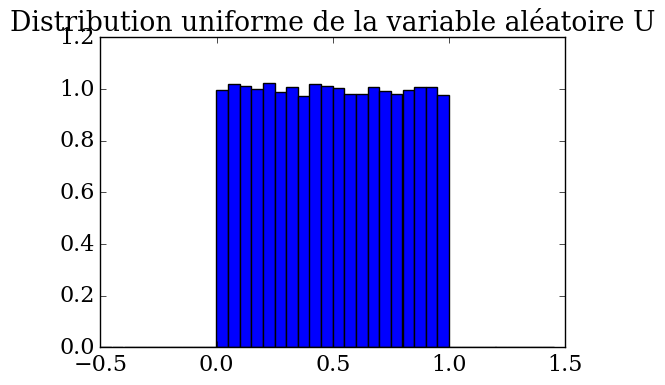

In [11]:
binwidth=0.05
pyplot.title('Distribution uniforme de la variable aléatoire U')
pyplot.xlim(-0.5,1.5)
pyplot.hist(u,bins=numpy.arange(-0.5,1.5, binwidth),normed=True);

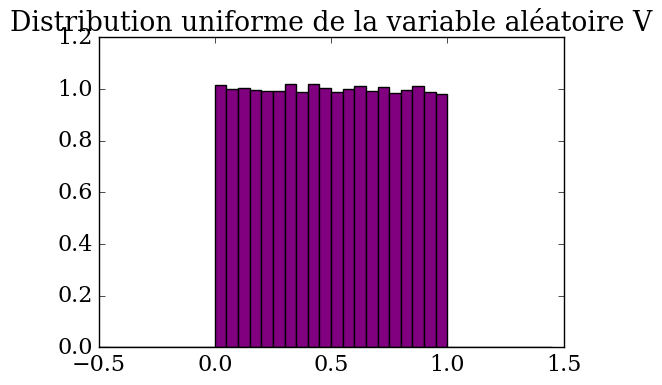

In [12]:
binwidth=0.05
pyplot.xlim(-0.5,1.5)
pyplot.title('Distribution uniforme de la variable aléatoire V')
bins=numpy.arange(-0.5,1.5, binwidth)
pyplot.hist(v,bins,normed=True,color='purple');

A présent nous pouvons appliquer l'algorithme de Box-Muller:

In [13]:
z=numpy.zeros(100000)
w=numpy.zeros(100000)
for j in range (0,len(u)):
    z[j]=numpy.sqrt(-2*numpy.log(u[j]))*numpy.cos(2*numpy.pi*v[j])
    w[j]=numpy.sqrt(-2*numpy.log(u[j]))*numpy.sin(2*numpy.pi*v[j])

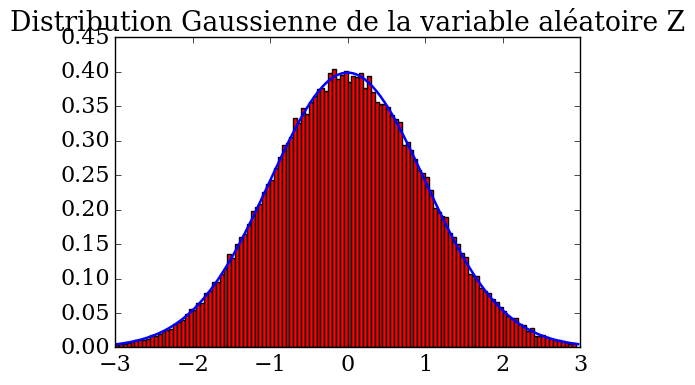

In [14]:
binwidth=0.05
bins=numpy.arange(-3.,3., binwidth)
pyplot.title('Distribution Gaussienne de la variable aléatoire Z')
pyplot.xlim(-3,3)
pyplot.hist(z,bins,normed=True, color='red');

xc = bins+(binwidth/2)
pyplot.plot(xc,numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=1.8,color='blue')

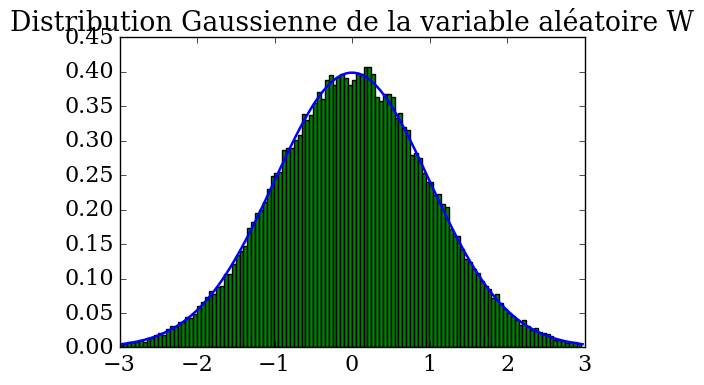

In [15]:
binwidth=0.05
pyplot.xlim(-3,3)
bins=numpy.arange(-3.,3., binwidth)
pyplot.title('Distribution Gaussienne de la variable aléatoire W')
pyplot.hist(w,bins,normed=True,color='green');
xc = bins+(binwidth/2)
pyplot.plot(xc,numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=1.8,color='blue')

## Challenge 2: Mouvement aléatoire

### Partie 1:

"- Add as systematic contribution to the displacement $dx$,

$$
dx=cdt+\sqrt{2\alpha dt}\cal{N(0,1)}
$$

where $c$ is a constant and analyse the behaviour of the random walk. Can you guess the corresponding equation governing the evolution of the density in this case? What is the analytical solution for an initial Gaussian distribution?

In [16]:
# Generate a set of initial positions based on the Gaussian distribution
npart=100000

# We set mu=0
sigma = 1.0
x0 = numpy.random.normal(loc=0,scale=sigma,size=npart)

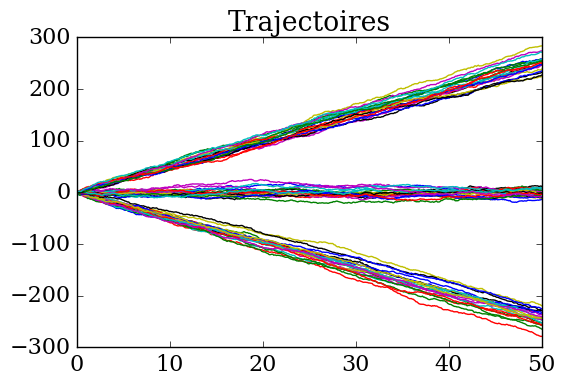

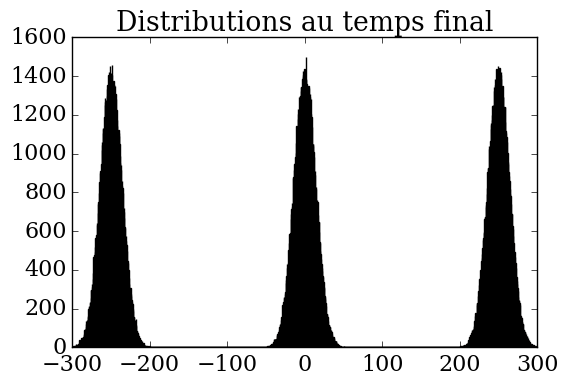

In [17]:
T=50.0
nt=500
dt=T/nt
alpha=2.0

c=[-5,0,5]

for j in range(len(c)):

    t = numpy.arange(0,T+dt,dt)
    x = numpy.empty([nt+1,npart])

    x[0]=x0

    for i in range(nt):
   
            x[i+1]=x[i]+c[j]*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)

    for i in range(20):
        pyplot.figure(1)
        pyplot.title('Trajectoires')
        pyplot.plot(t,x[:,i])
    
    pyplot.figure(2)
    pyplot.title('Distributions au temps final')
    pyplot.hist(x[nt],bins=numpy.arange(-300,300., 0.5),normed=False, color='red');

=> Le terme c.dt peut donc être vu comme un terme de dérive jouant sur toutes les particules de la même manière et n'affectant donc pas la distribution des particules durant leur évolution.

Voyons comment la valeur du facteur c affecte la position du centre de la distribution, seule élément propre à la distribution qui est modifiée par la présence du terme en c.
Grâce à numpy.mean, qui trouve le centre d'une distribution symétrique (comme la gaussienne), on pourra obtenir un graphique de la position de celui-ci en fonction de c.

In [18]:
T=50.0
nt=500
dt=T/nt
alpha=2.0

c=numpy.linspace(-5,0,10)
center=numpy.zeros(len(c))

for j in range(len(c)):

    t = numpy.arange(0,T+dt,dt)
    x = numpy.empty([nt+1,npart])
    
    x[0]=x0

    for i in range(nt):
   
            x[i+1]=x[i]+c[j]*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
  
      
    center[j]=numpy.mean(x[nt])


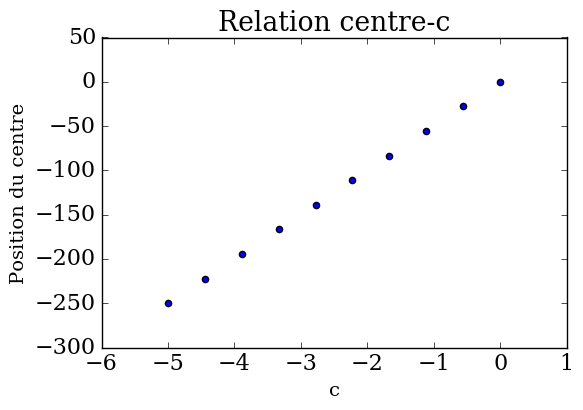

In [19]:
pyplot.title('Relation centre-c')
pyplot.scatter(c,center)
pyplot.xlabel('c',fontsize=14)
pyplot.ylabel('Position du centre',fontsize=14)

La relation semble être linéaire.
Vérifions à l'aide de l'outil de régression linéaire de scipy :

In [20]:
regress=scipy.stats.linregress(c,center)
print('Coefficient de corrélation de la régression linéaire :',regress[2])

Coefficient de corrélation de la régression linéaire : 0.999999925238


=> La relation centre-c est linéaire.

On a que la pente de la droite correspond à la valeur de T.
#### Ici :

In [21]:
print ('Pente de la droite =', regress[0])
print('T =', T)

Pente de la droite = 50.0042968972
T = 50.0


### Partie 2:

- Simulate the following random walk with a 'friction' term:

$$
dx=-\gamma x dt + \sqrt{2\alpha dt}\cal{N(0,1)}
$$

Check that the distribution reaches a steady state for $t\rightarrow \infty$. Can you guess the corresponding equation governing the evolution of the density in this case? What is analytical form for the steady state? These last two questions are not easy!"

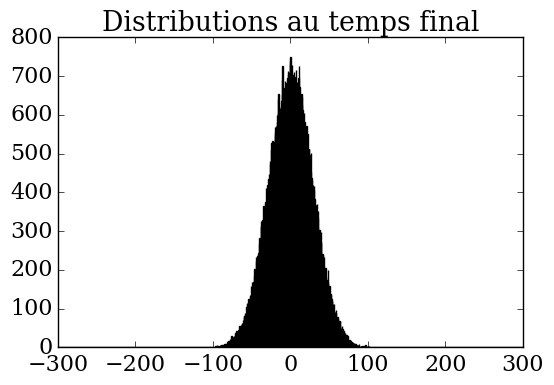

In [22]:
T=200.0
nt=500
dt=T/nt
alpha=2.0

#gamma=0

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
   
        x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
    
x1=list(x)
    
pyplot.figure(2)
pyplot.title('Distributions au temps final')
pyplot.hist(x[nt],bins=numpy.arange(-300,300., 0.5),normed=False, color='red');

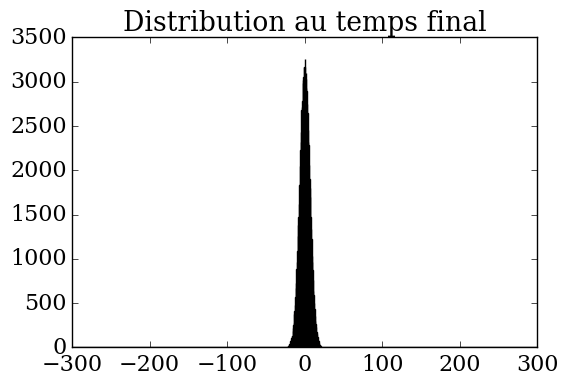

In [23]:
f=-0.05
#gamma = 0.05

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
   
        x[i+1]=x[i]+f*x[i]*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)

x2=list(x)

    
pyplot.figure(2)
pyplot.title('Distribution au temps final')
pyplot.hist(x[nt],bins=numpy.arange(-300,300., 0.5),normed=False, color='red');

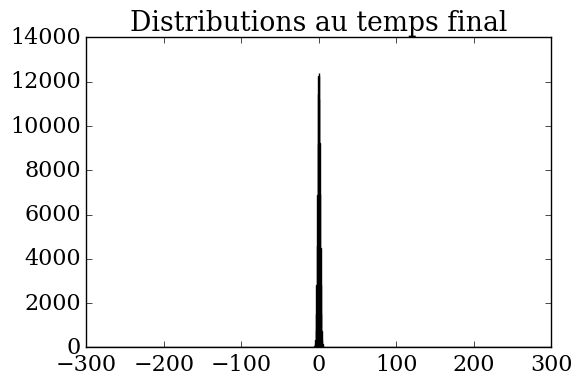

In [24]:
f=-1
#gamma = 1

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
   
        x[i+1]=x[i]+f*x[i]*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
    
x3=list(x)

pyplot.figure(2)
pyplot.title('Distributions au temps final')
pyplot.hist(x[nt],bins=numpy.arange(-300,300., 0.5),normed=False, color='red');

#### Évolution temporelle

On utilise maintenant les valeurs stockées pour les positions à chaque pas de temps et numpy.var() pour calculer la variance à plusieurs instants pour chacune des trois valeurs de gamma étudiées afin d'examiner l'évolution de l'écart-type de la distribution au cours du temps pour les différentes valeurs du coefficient de frottement.

In [25]:
j=numpy.linspace(0,nt,36)

var1=numpy.zeros(len(j))
var2=numpy.zeros(len(j))
var3=numpy.zeros(len(j))

k=0

while k<len(j) :
    var1[k]=numpy.var(x1[int(j[k])])
    var2[k]=numpy.var(x2[int(j[k])])
    var3[k]=numpy.var(x3[int(j[k])])
    
    k+=1

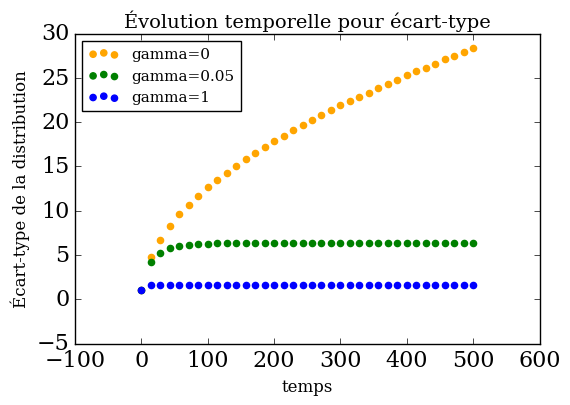

In [26]:
pyplot.title('Évolution temporelle pour écart-type', fontsize=14)
pyplot.scatter(j,numpy.sqrt(var1),label='gamma=0',color='orange')
pyplot.scatter(j,numpy.sqrt(var2),label='gamma=0.05',color='green')
pyplot.scatter(j,numpy.sqrt(var3),label='gamma=1',color='blue')
pyplot.xlabel('temps',fontsize=12)
pyplot.ylabel('Écart-type de la distribution',fontsize=12)
pyplot.legend(loc='upper left',fontsize=11)

#### Comment le coefficient de frottement régit-il le comportement de la distribution ?

Examinons le comportement de la distribution en fonction du coefficient de frottement en regardant comment se comportent la hauteur du pic de la fonction de distribution et son écart-type en fonction de ce coefficient, que nous ferons varier entre 0 et 1 :

In [29]:
f=numpy.linspace(-1,0.,20) #gamma entre 0 et 1
count_peak=numpy.zeros(20) #permet de trouver la hauteur du pic pour une valeur de f donnée
variance=numpy.zeros(20)

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]
while pos_in_f < 20 :
    for i in range(nt):
        
        x[i+1]=x[i]+f[pos_in_f]*x[i]*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
    
    # qui suit est l'équivalent de compter le contenu des deux boîtes de l'histogramme les plus proches du centre de la distribution.
=x0


pos_in_f=0
    for element in x[nt]:
        if numpy.abs(element)<0.5 : 
            count_peak[pos_in_f]+=1
            
    variance[pos_in_f]=numpy.var(x[nt])
            
#    On prend comme hauteur de pic la moyenne des contenus des deux boîtes situées de part et d'autre du centre de la distribution.
    count_peak[pos_in_f]=count_peak[pos_in_f]/2 
    
    
    pos_in_f+=1
    

SyntaxError: invalid syntax (<ipython-input-29-68d144b48bcb>, line 15)

In [28]:
écart=numpy.sqrt(variance)
pyplot.title('Relation Écart-type/f')
pyplot.scatter(f,écart)
pyplot.xlabel('f=-gamma',fontsize=12)
pyplot.ylabel('Écart-type de la distribution',fontsize=12)

NameError: name 'variance' is not defined

NameError: name 'count_peak' is not defined

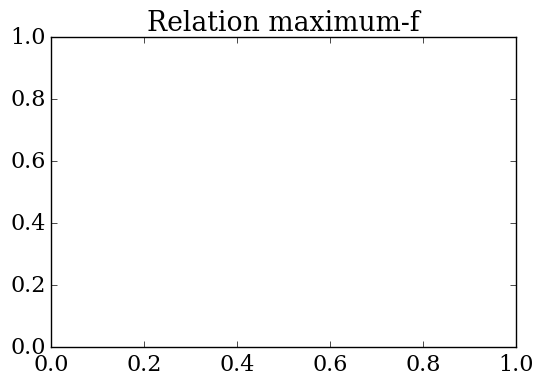

In [30]:
pyplot.title('Relation maximum-f')
pyplot.scatter(f,count_peak,color='green')
pyplot.xlabel('f=-gamma',fontsize=12)
pyplot.ylabel('hauteur du pic de la distribution',fontsize=12)

## Challenge 3: Modèle d'Ising
Le but du Modèle d'Ising est de modéliser la transition de phase ferro-paramagnétique qui apparaît à la température de Curie  $T_C$
#### Partie 1:

Nous allons vérifier que la méthode de metropolis fournit une probabilité d'échange $p_{flip}$ correspondant à la formule:
$$p_{\rm flip}=e^{-\Delta E}$$
où
$$\Delta E = -{\alpha} s_i \sum_{j \in n(i)} s_j$$
les $n(i)$ sont les sites voisins du site i et $$\alpha=\frac{J}{k_{B}T}$$

On reprend du numerical-mooc la définition de l'état initial où tous les spins sont distribués aléatoirement (chacun peut prendre une valeur discrète 1 (spin up) ou -1(spin down):

In [31]:
def initial_state(nx,ny):
    """ Creates a lattice with random spin orientations
   
    Parameters:
    ----------
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
   
    Returns:
    -------
    r: 2D array of spins
    """
       
    # Uniform random spins between 0 and 1  
    r = numpy.random.randint(0,2,(nx,ny))
    
    # Where r=0, we assign a negative spin
    r[r==0] =-1

    return r

On reprend également du mooc la fonction energy_at_site qui calcule simplement l'énergie à un site spécifique (ix,iy) selon la formule:
$$E_{i} = -{\alpha} s_i \sum_{j \in n(i)} s_j$$
Ainsi que la fonction metropolis_at_site qui échange le spin du site (ix,iy) de façon aléatoire:
on engendre un nombre aléatoire p et on échange le spin si:
$$exp(-\Delta E)>p$$
où $\Delta E$ est la différence entre l'énergie au site (ix,iy)si le spin est changé et la même énergie si le site est inchangé.

In [32]:
def energy_at_site(sp,alpha,sigma,ix,iy):
    """ Computes the contribution to the energy for a given spin
    at location ix,iy for a lattice with periodic boundary conditions
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    sigma   : int
        spin at site ix,iy
    ix   : int
        location in x
    iy   : int
        location in y
    
   
    Returns:
    -------
    energy: energy for the given configuration
    """
    
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    return energy

In [33]:
def metropolis_at_site(sp,alpha,ix,iy):
    """ Flips a dipole at site ix, iy when probability condition is met 
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    ix   : int
        location in x
    iy   : int
        location in y
    """
    sigma=sp[ix,iy]
    energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy)
    
    # Flip the site with Metropolis probability
    # Condition is always satisifed if dE < 0
    if (numpy.random.random_sample()<numpy.exp(-(energy_if_site_flipped \
                                               -energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]

Dans la cellule suivante, on effectue la méthode en partant à chaque fois d'un état initial différent. Suivant cet état initial, le résultat attendu est différent. Nous renvoyons la valeur calculée par la méthode ainsi que la valeur théorique et le delta correspondant. Il y a en fait cinq cas possible repris ci-dessous en fonction de la distribution initiale.

In [34]:
nx=10
ny=10

# Non-dimensional coupling constant J/(kb*T)
alpha = 0.1

def get_updown_ratio() :
    
    # Initial spins at each site
    sp = initial_state(nx,ny)
    #pyplot.figure(figsize=(4,4))
    #pyplot.imshow(sp,interpolation="none",origin='lower')


    NMC = 100000
    states = numpy.empty(NMC+1)
    states[0]=sp[5,5]

    for n in range(0,NMC):
        metropolis_at_site(sp,alpha,5,5)
        states[n]=sp[5,5]

    ups = numpy.extract(states==1, states).size
    downs = NMC - ups
    delta=energy_at_site(sp,alpha,-1,5,5)-energy_at_site(sp,alpha,1,5,5)
    
    
    
    return (ups/downs, numpy.exp(delta))
    


Spins entourant la case (5,5):
- 4 rouges 0 bleu => $\frac{p({\rm up})}{p({\rm downs})} = e^{-\Delta E}=e^{0.8}\approx 2.22$
- 3 rouges 1 bleu => $\frac{p({\rm up})}{p({\rm downs})} = e^{-\Delta E}=e^{0.4}\approx 1.49$
- 2 rouges 2 bleus => $\frac{p({\rm up})}{p({\rm downs})} = e^{-\Delta E}=e^{0.0}=1.0$
- 1 rouge 3 bleus => $\frac{p({\rm up})}{p({\rm downs})} = e^{-\Delta E}=e^{-0.4}\approx 0.67$
- 0 rouge 4 bleus => $\frac{p({\rm up})}{p({\rm downs})} = e^{-\Delta E}=e^{-0.8}\approx 0.45$


Ci-dessous, nous exécutons get_updown_ratio() plusieurs fois jusqu'à obtenir tous les cas possibles et vérifier la correspondance.

Le temps d'exécution de cette cellule varie car le temps écoulé avant l'obtention d'une combinaison inédite parmi les cinq est variable et la probabilité d'obtention d'une des cinq combinaisons diffère selon la combinaison.

In [35]:
a = numpy.zeros(5)
c = numpy.zeros(5)
i=0
while (a[4]==0) : 
    b = get_updown_ratio()
     
    if b[1] in a :
        e=0
    else :
        
        a[i]=b[1]
        c[i]=b[0]
        
        i+=1
print ('exp (- ΔE ) =',a)
print ('taux de haut/bas = ',c)
print ('')
print('différence entre le taux obtenu et exp (- ΔE ) =', abs(a-c))


exp (- ΔE ) = [ 0.44932896  1.4918247   0.67032005  1.          2.22554093]
taux de haut/bas =  [ 0.44984269  1.50225203  0.67003457  1.          2.21760674]

différence entre le taux obtenu et exp (- ΔE ) = [ 0.00051373  0.01042733  0.00028548  0.          0.00793418]



On observe bien que la méthode métropolis donne un résultat cohérent quel que soit l'état initial de distribution des spins.

 #### Partie 2
À présent nous allons appliquer de modèle d'Ising à un réseau de spins tous up initialement et en déduire la magnétisation et l'énergie moyenne de notre échantillon pour différentes valeurs de $\alpha$ comprises dans l'intervalle $[0,1]$. On s'attend à observer une transition du second ordre en la magnétisation moyenne à la transition ferromagnétique-paramagnétique. Comme $\alpha$ est  l'inverse de la température et que le matériau est ferromagnétique en dessous de la température de Curie et paramagnétique au-delà, on s'attend à ce que la magntisation moyenne soit nulle aant un certain $\alpha$ critique et devienne non nulle après la transition.
Ensuite, nous referons la même analyse pour une configuration initiale différente.



In [36]:
import matplotlib.cm as cm
import matplotlib.animation as animation
from IPython.display import HTML

In [37]:
nx=100
ny=100
NMC=100

On reprend du numerical-mooc la fonction ising_model_metropolis qui applique en fait le modèle d'Ising à un réseau initial sp

In [38]:
def ising_model_metropolis(sp, NMC, nx, ny, alpha):
    """ Creates a sequence of states for the Ising model using
    the Metropolis algorithm
   
    Parameters:
    ----------
    sp   : initial lattice state
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
    NMC  : int
        Number of states to create
    alpha  : real
        coupling constant J/(kb*T)
    Returns:
    -------
    states: sequence of states
    """
    states = numpy.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=numpy.random.randint(0,nx)
            iy=numpy.random.randint(0,ny)
            metropolis_at_site(sp,alpha,ix,iy)
        states[i]=sp.copy()
    return states

In [56]:
alpha0=0.4 #on peut changer le alpha ici pour visualiser les différentes valeurs
sp = numpy.ones([nx,ny])
states_alpha = ising_model_metropolis(sp, NMC, nx, ny, alpha0)
    
fig = pyplot.figure(figsize=(5,5))
img1 = pyplot.imshow(states_alpha[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)
def animate(i):
        img1.set_array(states_alpha[i])
    
anim=animation.FuncAnimation(fig, animate, frames=NMC, interval=200)
pyplot.close()
HTML(anim.to_html5_video())

Nous allons calculer la magnétisation et l'énergie moyenne sur cet état initial après qu'il ait été traité par le modèle d'Ising. Pour rappel:

- Magnétisation $<M>$:
$$<M> = \frac{\sum_k M_k}{N_k}
$$
$$M_k=\sum_{i=1}^N s_i$$ 
- Energie $<E>$: 
$$<E> = \frac{\sum_k E_k}{N_k}
$$
$$
E_k=-2\alpha\sum_{pairs(i,j)} s_i s_j$$


In [40]:
def mean_magnetisation(alpha,NMC,state_alpha):
    magnetisation_NMC=numpy.empty([2,NMC-50])
    summagTOT=0
    for i in range (50,NMC):#j'ai pris seulement les états au-delà de 10 pour ne pas perturber la moyenne (cf notebook)
        summag=0
        for j in range (nx):
            for k in range (ny):
                summag=summag+state_alpha[i,j,k] 
        magnetisation_NMC[0,i-50]=i
        magnetisation_NMC[1,i-50]=summag/(nx*ny)
        summagTOT=summagTOT + summag
    pyplot.plot(magnetisation_NMC[0], magnetisation_NMC[1],label=r'$<M>$')
    pyplot.legend()
    pyplot.tight_layout()
    return summagTOT/((NMC-50)*nx*ny)

In [41]:
def mean_energy(alpha,NMC,state_alpha):
    
    sumen=0
    for i in range (50,NMC):
        for j in range (nx):
            for k in range (ny):
                sumen=sumen+energy_at_site(state_alpha[i],alpha,state_alpha[i,j,k],j,k)
    return sumen/((NMC-50)*nx*ny)

On initialise le réseau avec tout les spins up :

In [42]:
state_up = numpy.ones([nx,ny])

Pour avoir une magnétisation moyenne qui ne tient compte des états que lorsqu'ils sont stabilisés, on peut regarder la forme de states_alpha. Pour la plupart des alphas, cette stabilisation est réalisée après 20 étapes. Cependant pour $\alpha=0.4$, cette stabilisation est très lente (même en 100 étapes elle ne semble pas s'être tout à fait effectuée. Nous comprendrons cet effet plus tard lors de notre analyse.
Pour tenir compte de cela, nous allons faire la moyenne sur les 50 dernières étapes pour tous nos alphas.

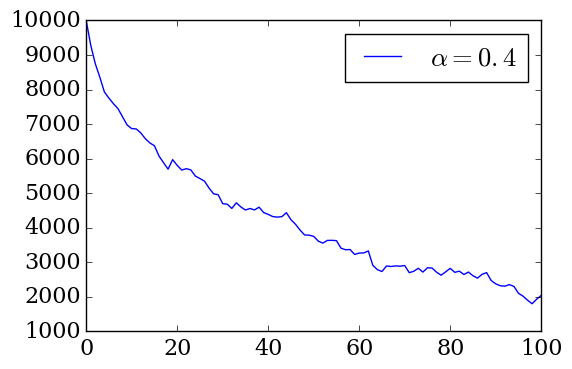

In [43]:
states_alpha=ising_model_metropolis(state_up, 100, nx, ny, 0.4)
pyplot.figure()
pyplot.plot(states_alpha.sum(axis=(1,2)),label=r'$\alpha=0.4$')
pyplot.legend()
pyplot.tight_layout()

La cellule suivante prend énormément de temps à s'éxécuter. Par conséquent, nous l'éxécutons ici sur un petit nombre d'alpha.

0.0
0.2
0.4
0.6000000000000001
0.8
1.0


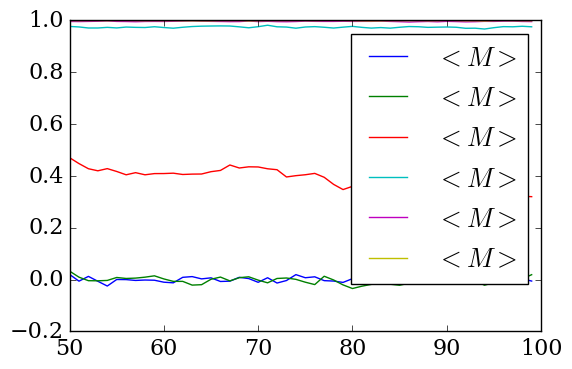

In [44]:
N=5 #nombre de valeurs d'alphas explorées sur l'intervalle [0,1]
d_alpha=1.0/N
alpha=0.0
i=0
magnetisation=numpy.zeros([2,N+1])
while i<=N:
    state_up=numpy.ones([nx,ny])
    state_alpha=ising_model_metropolis(state_up, NMC, nx, ny, alpha)
    magnetisation[0,i]=alpha
    print(alpha)
    magnetisation[1,i]=mean_magnetisation(alpha,100,state_alpha)
    alpha=alpha+d_alpha
    i=i+1

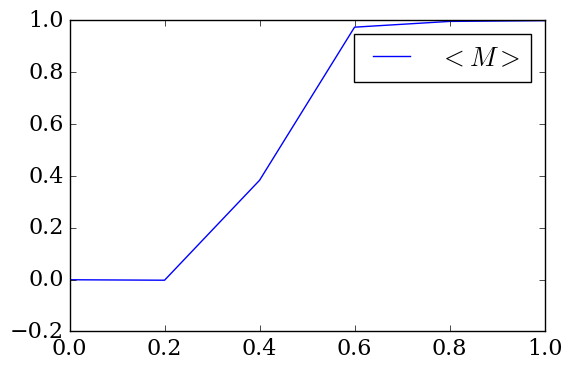

In [45]:
pyplot.plot(magnetisation[0], magnetisation[1],label=r'$<M>$')
pyplot.legend()
pyplot.xlim(0.0,1.0)
pyplot.tight_layout()

Malgré le petit nombre de points, la forme de cette courbe est bien ce à quoi nous nous attendions: au-delà d'un certain $\alpha$, c'est-à-dire en dessous d'une certaine température, la magnétisation moyenne cesse d'être nulle et le matériau devient ferromagnétique.
Afin de pouvoir déterminer plus précisément la valeur de $\alpha$ critique à laquelle cette transition à lieu, nous avons fait tourner notre code pour $N=100$ (nous ne le faisons pas ici car le temps d'éxécution est de 2h30):

Voici le résultat obtenu pour la magnétisation moyenne normalisée (en ordonnées) en fonction de $\alpha$ (en abscisses):

<img src=".\MeanMagnetisation1.png" width="400" height="400" />

Grâce à cette analyse, nous pouvons estimer que le $\alpha$ critique, valeur au point d'inflexion de notre courbe, est proche de la solution exacte de Onsager pour ce système , qui est : $\alpha_{c}=0.44$. Notre solution est cohérente avec cette valeur dans les limites de la précision graphique obtenue. Nous pouvons donc considérer que la méthode et le modèle d'Ising reproduisent correctement le système physique étudié.

Nous nous intéressons ensuite à l'energie moyenne du système:
À nouveau, nous éxécutons le code ici pour 5 valeurs de $\alpha$. Le résultat sur 100 valeurs est également fourni:

In [46]:
N=5
d_alpha=1.0/N
alpha=0.0
i=0
energy=numpy.zeros([2,N+1])
while i<=N:
    state_up=numpy.ones([nx,ny])
    state_alpha=ising_model_metropolis(state_up, NMC, nx, ny, alpha)
    energy[0,i]=alpha
    print(alpha)
    energy[1,i]=mean_energy(alpha,100,state_alpha)
    alpha=alpha+d_alpha
    i=i+1

0.0
0.2
0.4
0.6000000000000001
0.8
1.0


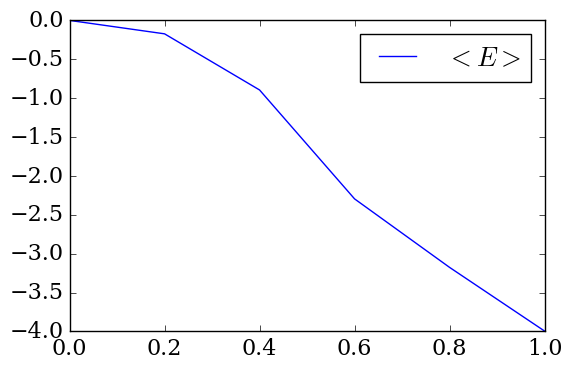

In [47]:
pyplot.plot(energy[0],energy[1],label=r'$<E>$')
pyplot.legend()
pyplot.xlim(0.0,1.0)
pyplot.tight_layout()

Energie moyenne en fonction de $\alpha$ sur 100 valeurs de $\alpha$:
<img src=".\MeanEnergy1.png" width="400" height="400" />

Le point d'inflexion de l'énergie moyenne se situe également en $\alpha=0.4$. Ceci renforce notre conviction qu'il s'agit bien de la valeur critique de transition recherchée.

#### Essayons avec une autre configuration initiale, où les spins sont up sur les bords et distribués aléatoirement à l'intérieur.

In [48]:
state_up_on_edges = numpy.ones([nx,ny])
interior_grid = numpy.random.randint(0,2,(nx,ny))
state_up_on_edges[10:-10,10:-10] = interior_grid[10:-10,10:-10]
state_up_on_edges[state_up_on_edges==0] =-1
initial_edge=state_up_on_edges.copy()

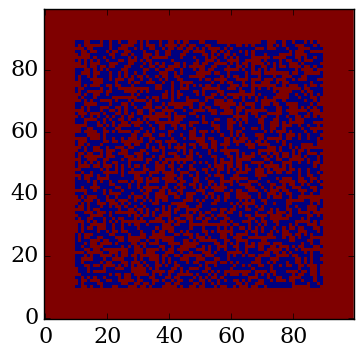

In [49]:
pyplot.figure(figsize=(4,4))
pyplot.imshow(initial_edge,interpolation="none",origin='lower')

Pour que la différence soit bien visible, nous laissons un état spins up sur les dix états du bords de chaque côtés de la grille. Nous ne touchons pas à ces états. La magnétisations moyenne sera donc non nulle même pour $\alpha=0$. Le reste de la grille est initialisé avec des spins aléatoires auxquels nous appliquons le modèle d'Ising:

0.0
0.2
0.4
0.6000000000000001
0.8
1.0


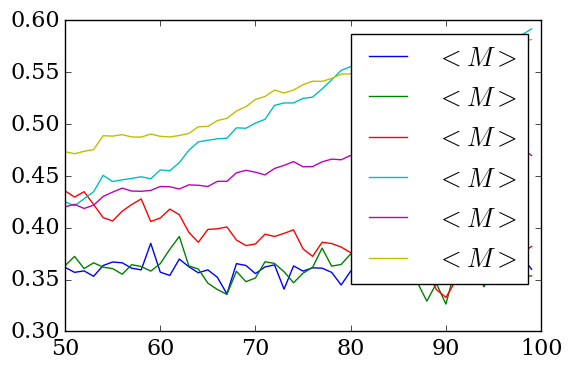

In [50]:
N=5
d_alpha=1.0/N
alpha=0.0
i=0
magnetisation2=numpy.zeros([2,N+1])
while i<=N:
    state=state_up_on_edges.copy()
    state_alpha=numpy.ones([NMC+1,nx,ny])
    state_alpha[:,10:-10,10:-10]=ising_model_metropolis(state, NMC, nx, ny, alpha)[:,10:-10,10:-10]
    magnetisation2[0,i]=alpha
    print(alpha)
    magnetisation2[1,i]=mean_magnetisation(alpha,100,state_alpha)
    alpha=alpha+d_alpha
    i=i+1

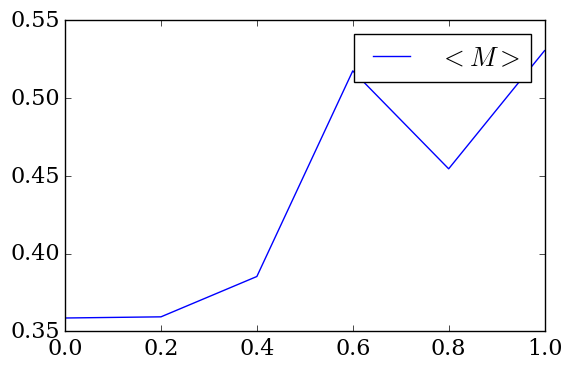

In [52]:
pyplot.plot(magnetisation2[0], magnetisation2[1],label=r'$<M>$')
pyplot.legend()
pyplot.xlim(0.0,1.0)
pyplot.tight_layout()

Ce graphique ne nous apprend pas grand chose. À cause de la distribution aléatoire que nous utilisons au centre de la grille, il sera différent à chaque itérations. Pour comprendre ce qu'il se passe vraiment, regardons le résulat pour 100 valeurs de $\alpha$:

<img src=".\MeanMagnetisation2.png" width="400" height="400" />

Ceci nous permet de mieux comprendre ce qu'il se passe:
à petit $\alpha$ (haute température), la magnétisation moyenne du centre de la grille est nulle tandis que les bords contribue pour donner une magnétisation moyenne de 0.35 environ. Cependant après une certaine valeur de $\alpha$, le centre va également posséder une magnétisation. Comme on part d'un état aléatoire, pour chaque $\alpha$ le sens dans lequel la magnétisation va s'effectuer est inconnu apriori, au contraire du premier cas où on s'attendait à une magnétisation vers le haut puisqu'on démarrait avec des spins up partout. C'est pour cela que l'on observe la magnétisation moyenne zigzaguer autour de la valeur de la magnétisation fournie par les bords.

In [53]:
N=5
d_alpha=1.0/N
alpha=0.0
i=0
energy2=numpy.zeros([2,N+1])
while i<=N:
    state=state_up_on_edges.copy()
    state_alpha=numpy.ones([NMC+1,nx,ny])
    state_alpha[:,10:-10,10:-10]=ising_model_metropolis(state, NMC, nx, ny, alpha)[:,10:-10,10:-10]
    energy2[0,i]=alpha
    print(alpha)
    energy2[1,i]=mean_energy(alpha,NMC,state_alpha)
    alpha=alpha+d_alpha
    i=i+1

0.0
0.2
0.4
0.6000000000000001
0.8
1.0


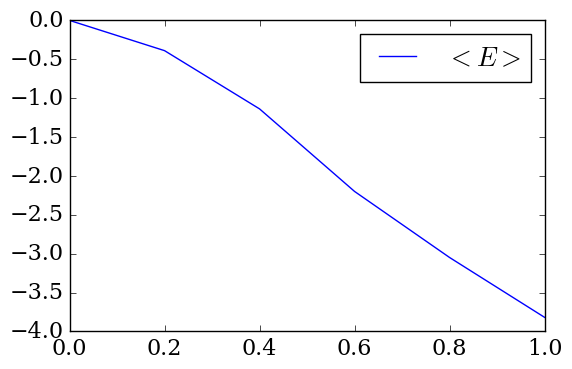

In [54]:
pyplot.plot(energy2[0],energy2[1],label=r'$<E>$')
pyplot.legend()
pyplot.xlim(0.0,1.0)
pyplot.tight_layout()

Pour 100 valeurs de $\alpha$:

<img src=".\MeanEnergy2.png" width="400" height="400" />

## Conclusion: